# Equalização Local de Histograma

Processamento Digital de Imagens

Nomes: Igor Teixeira Machado RA: 769708
Rafael Vinícius Passador RA: 790036

\begin{equation}
s_k = T(k) = \frac{L-1}{MN}\sum_{j=0}^{k}n_j
\end{equation}

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [31]:
# Definicao das funcoes

def histogram_equalization(img):
    
    bins = range(0, 257)
    hist, _ = np.histogram(img, bins)    # Calcula quantos pixels possuem cada nível de intensidade

    # Calcula a transformação para cada nível de intensidade
    mn = sum(hist)
    c = 255./mn                           # O valor de (L-1)/MN
    out_intensity = np.zeros(256)
    for k in range(256):
        soma = 0
        for j in range(0, k+1):
            soma += hist[j]
        out_intensity[k] = c*soma
    
    # Aplica a transformação
    img_eq = np.zeros(img.shape)
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = out_intensity[img[row, col]]
    
    return img_eq

def local_histogram_equalization(img, window_size=3):
    num_rows, num_cols = img.shape
    
    # Aplica o histograma local para cada pixel

    img_eq = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = histogram_equalization(img[row:row+window_size, col:col+window_size])

    return img_eq


def draw_hist(x_axis, input, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


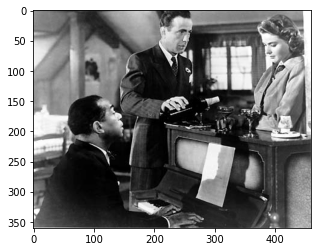

In [18]:
casablancaImg = cv2.imread('casablanca.tif', 0)
plt.imshow(casablancaImg, 'gray')

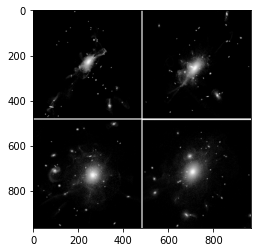

In [16]:
galaxy = cv2.imread('galaxy.tif', 0)
plt.imshow(galaxy, 'gray')

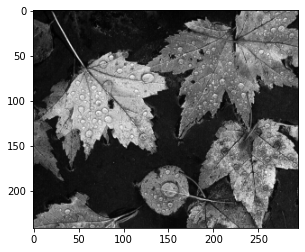

In [35]:
leaves = cv2.imread('leaves.tif', 0)
plt.imshow(leaves, 'gray')

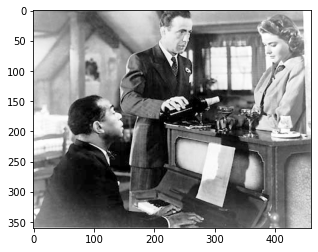

In [20]:
casablancaImgEq = histogram_equalization(casablancaImg)

plt.imshow(casablancaImgEq, 'gray')

In [32]:
casablancaImgLocalEq = local_histogram_equalization(casablancaImg)

#plt.imshow(casablancaImgLocalEq, 'gray')

ValueError: setting an array element with a sequence.